### Various ways of converting an image to grayscale

In [1]:
from skimage.io import imread
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

orig_img = imread('resources/auto.jpg')
plt.title("original image")
plt.axis('off') 
plt.imshow(orig_img)

### Method 1: The lightness method 
This method averages the most prominent and least prominent colors: (max(R, G, B) + min(R, G, B)) / 2.

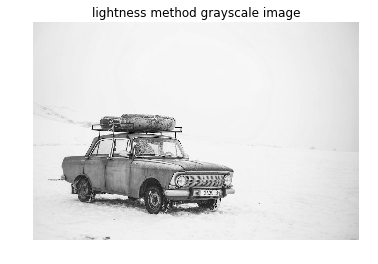

In [2]:
gray_light = np.copy(orig_img)
gray_light[:] = np.max(gray_light,axis=-1,keepdims=1)/2 + np.min(gray_light,axis=-1,keepdims=1)/2
plt.title("lightness method grayscale image")
plt.axis('off') 
plt.imshow(gray_light)
# io.imsave('testl.png', gray_light)

### Method 2: The average method
This method simply averages the values: (R + G + B) / 3

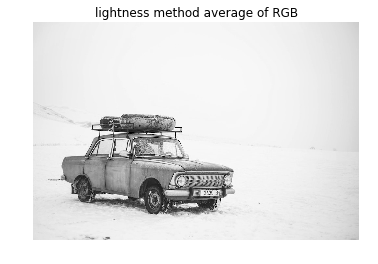

In [3]:
gray_avg = np.copy(orig_img)
gray_avg[:] = np.sum(gray_avg,axis=-1,keepdims=1)/3
plt.title("lightness method average of RGB")
plt.axis('off') 
plt.imshow(gray_avg)
# io.imsave('test2.png', gray_avg)

### Method 3: The luminosity method 
This is a more sophisticated version of the average method. It also averages the values, but it forms a weighted average to account for human perception. We're more sensitive to green than other colors, so green is weighted most heavily. The formula for luminosity is 0.21 R + 0.72 G + 0.07 B.

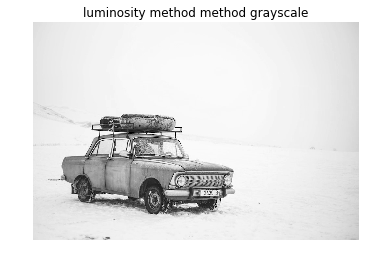

In [10]:
gray_lumin = np.copy(orig_img)
luminosity_constant = [0.21,0.72,0.07]
gray_lumin = np.dot(orig_img[...,:3], luminosity_constant).astype(np.uint8)
#can also use tensordot method to do the same.
# tensor_prod = np.tensordot(gray_lumin,luminosity_constant, axes=((-1,-1)))[...,None]
# gray_lumin[:] = tensor_prod.astype(gray_lumin.dtype)
plt.title("luminosity method method grayscale")
plt.axis('off') 
plt.imshow(gray_lumin, cmap="gray")
# io.imsave('test3.png', gray_lumin)